# Import Libraries & Load DataSet

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, adjusted_mutual_info_score
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', message="When grouping with a length-1 list-like")

# Load Dataset

In [8]:
df = pd.read_csv('Mall_Customers.csv')

# Display Dataset

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


# Dataset shape

In [13]:
df.shape

(200, 5)

# Checking data types

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
!pip install --upgrade plotly

# Age Distribution

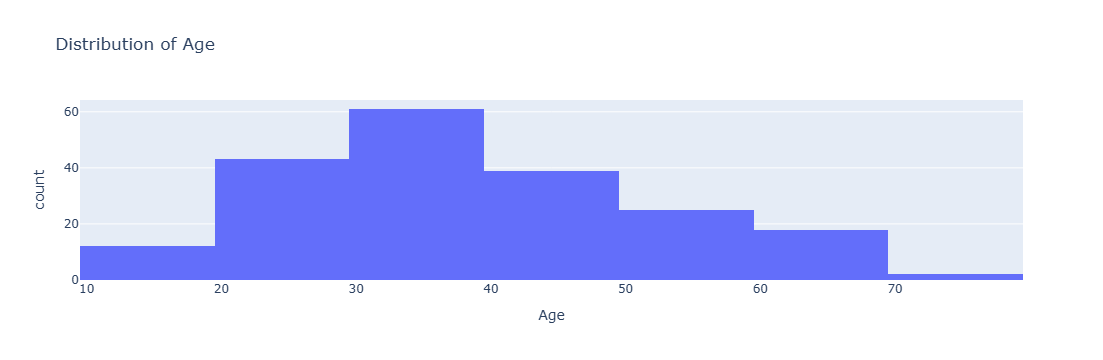

In [49]:
fig = px.histogram(df, x='Age', nbins=10, title='Distribution of Age')
fig.show()

# Annual Income Distribution

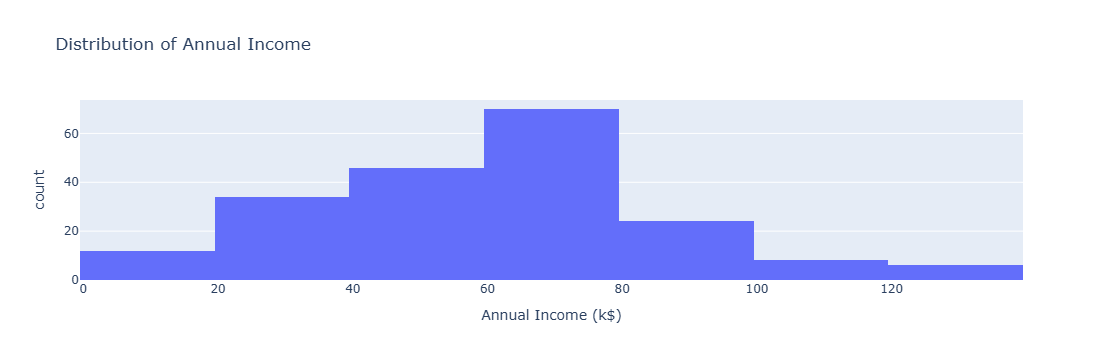

In [51]:
fig = px.histogram(df, x='Annual Income (k$)', nbins=10, title='Distribution of Annual Income')
fig.show()

# Spending Score Distribution

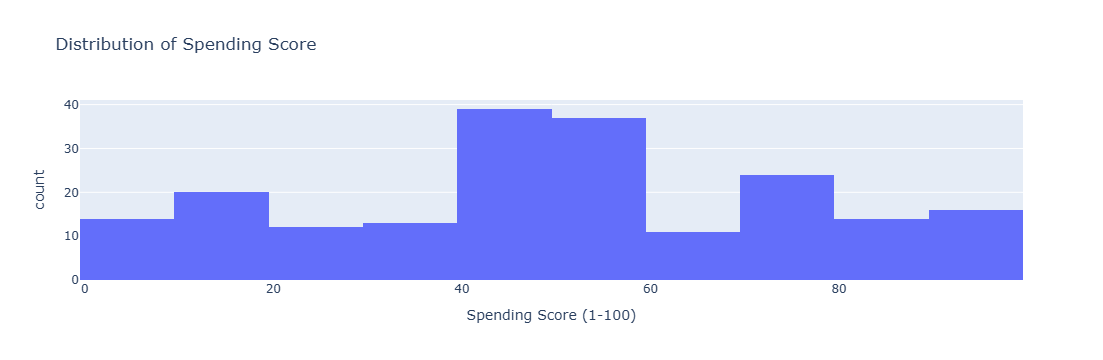

In [61]:
fig = px.histogram(df, x='Spending Score (1-100)', nbins=10, title='Distribution of Spending Score')
fig.show()

# Age vs Annual Income

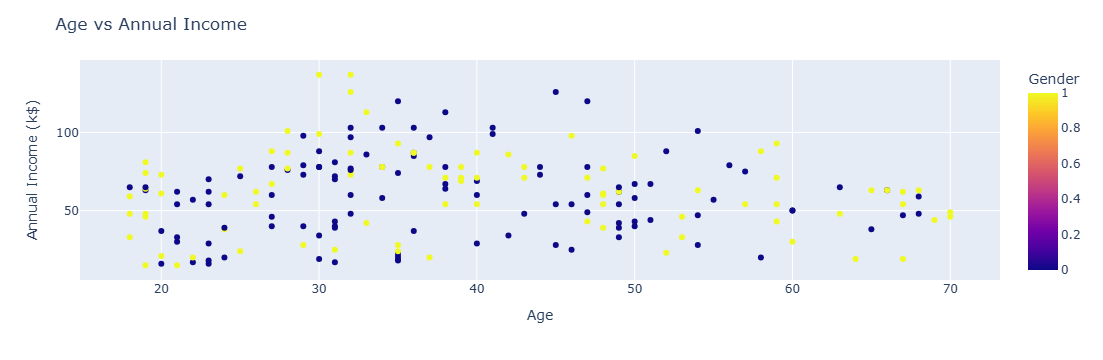

In [63]:
fig = px.scatter(df, x='Age', y='Annual Income (k$)', color='Gender', hover_data=['CustomerID'])
fig.update_layout(title='Age vs Annual Income')
fig.show()

# Annual Income vs Spending Score

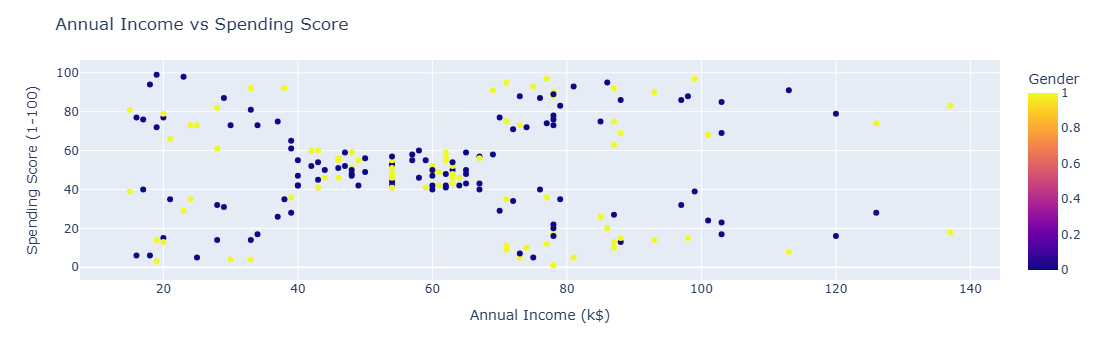

In [65]:
fig = px.scatter(df, x='Annual Income (k$)', y='Spending Score (1-100)', color='Gender', hover_data=['CustomerID'])
fig.update_layout(title='Annual Income vs Spending Score')
fig.show()

# Annual Income by Gender

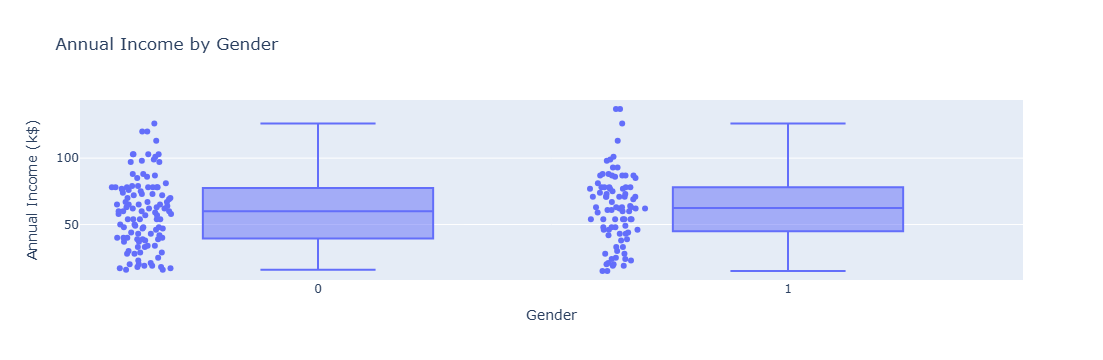

In [67]:
fig = px.box(df, x='Gender', y='Annual Income (k$)', points='all', title='Annual Income by Gender')
fig.show()

# Spending Score by Gender

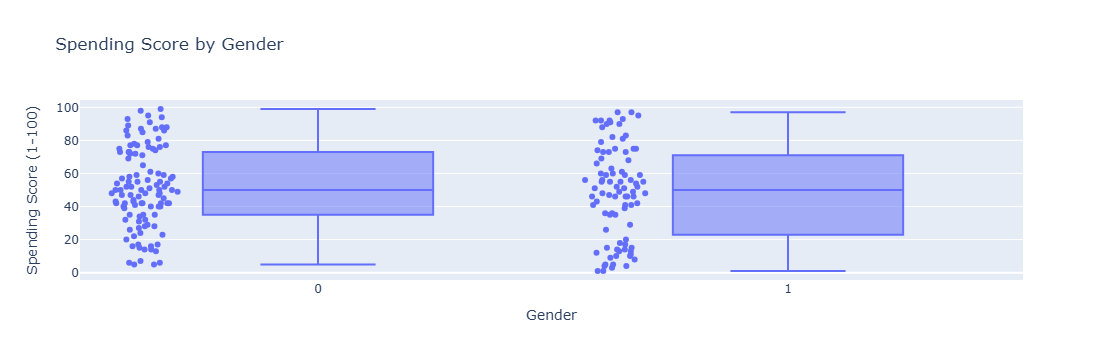

In [69]:
fig = px.box(df, x='Gender', y='Spending Score (1-100)', points='all', title='Spending Score by Gender')
fig.show()

# Check for missing values

In [71]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Convert gender into numerical values

In [73]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [74]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


# Select features for clustering

In [90]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data

In [94]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method

In [98]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

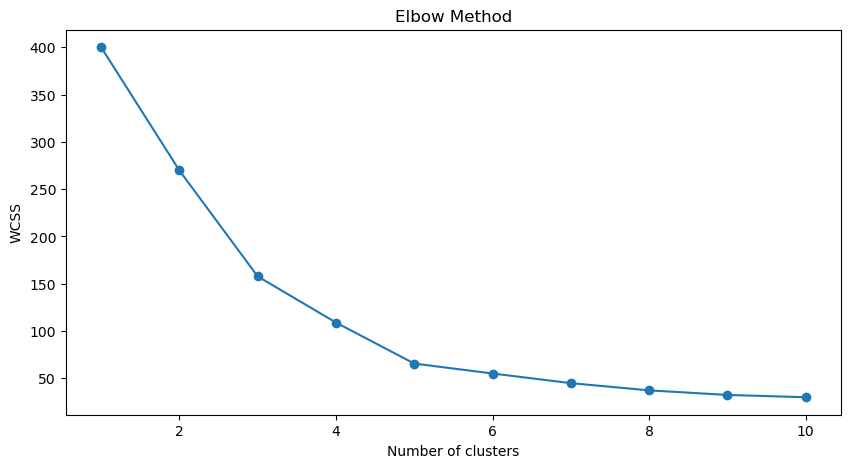

In [100]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Applying K-means to the dataset

In [104]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [107]:
df['Cluster'] = y_kmeans

# Visualize the clusters

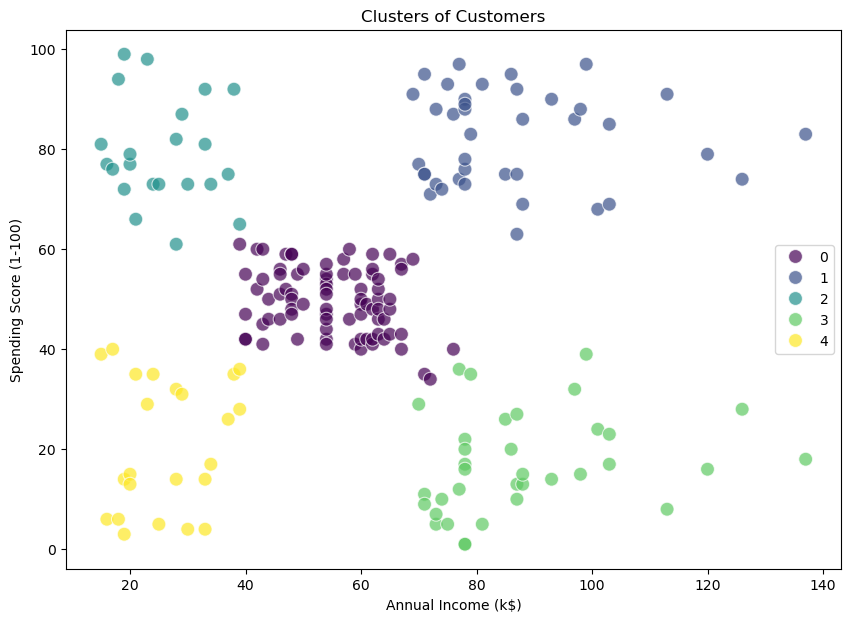

In [111]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# Clustering Evaluation Metrics

# Fit K-means

In [122]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

C:\Users\sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



# Inertia (WCSS)
Measures how tightly the clusters are formed. Lower values indicate more tightly clustered data points.

In [138]:
inertia = kmeans.inertia_
print(f"Inertia (WCSS): {inertia}")

Inertia (WCSS): 65.56840815571681


# Silhouette Score
Measures how similar an object is to its own cluster compared to other clusters. It ranges from -1 to 1, where a higher value indicates better-defined cluster.:

In [130]:
silhouette_avg = silhouette_score(X_scaled, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5546571631111091


# Conclusion:
### The K-means clustering algorithm effectively categorized customers into distinct groups based on their annual income and spending score. The evaluation metrics confirmed the robustness and reliability of the clustering. This analysis provides valuable insights into customer segments, enabling more targeted and effective marketing strategies.